https://www.kaggle.com/code/pkdarabi/traffic-signs-detection-using-yolov8/notebook

In [1]:
!pip install ultralytics

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/905.3 kB ? eta -:--:--
   ----------------------- ---------------- 524.3/905.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 905.3/905.3 kB 3.7 MB/s eta 0:00:00
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/43.6 MB 22.3 MB/s eta 0:00:02
   ---------------- ----------------------- 18.4/43.6 MB 50.4 MB/s eta 0:00:01
   ---------------- ----------------------- 18.4/43.6 MB 50.4 MB/s eta 0:00:01
   ---------------- ----------------------- 18.4/43.6 MB 50.4 MB/s eta 0:00:01
   ----------------- ---------------------- 18.6/43.6 MB 18.4 MB/s eta 0:00:02
   ----------------- ---------------------- 18.6/43.6 MB 18.4 MB/s eta 0:00:02
   ----------------- ---------------------- 19.1/43.6 MB 13.6 MB/s eta 0:00

In [1]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

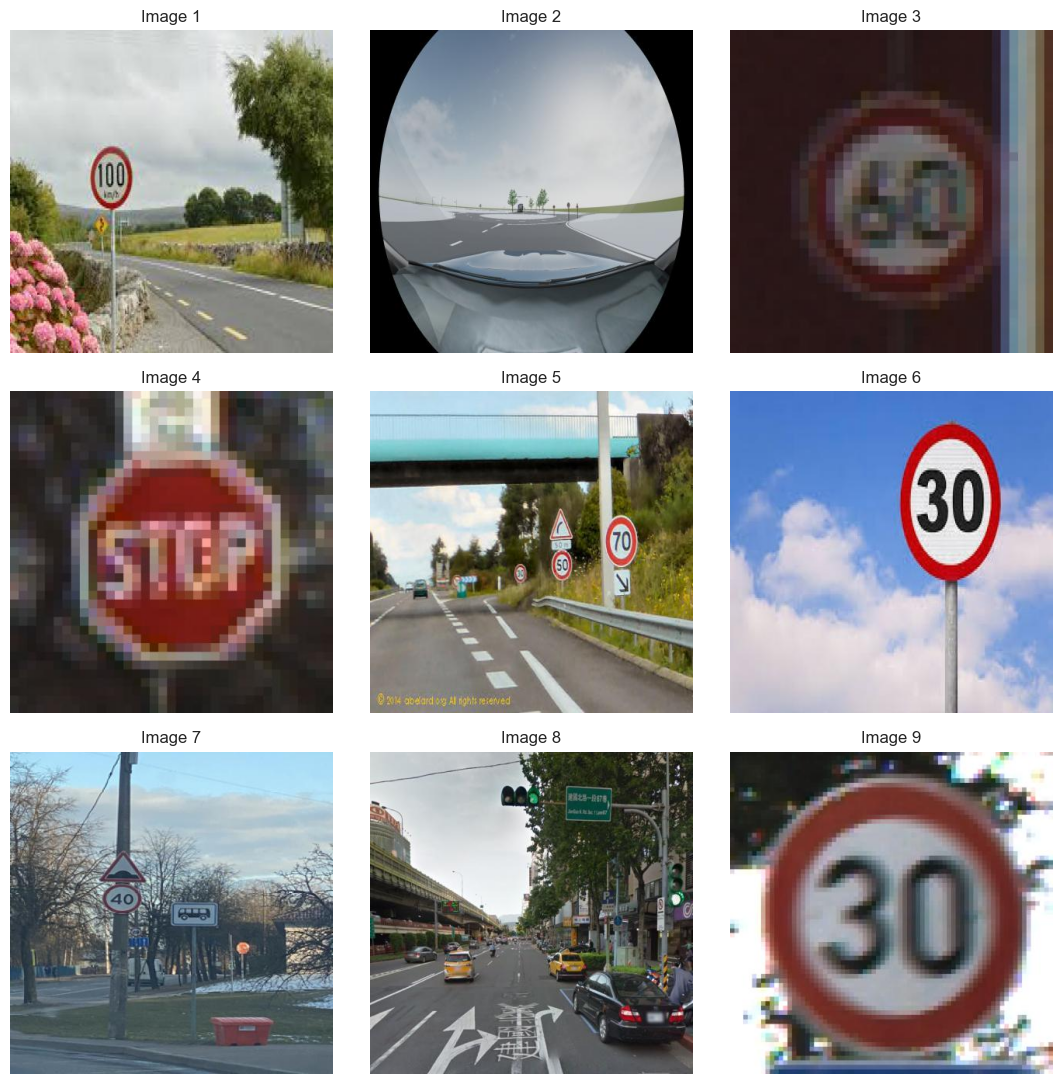

In [3]:
Image_dir = r'D:\ML\Traffic Sign Detection\car\train\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Get the size of the image
image = cv2.imread("D:/ML/Traffic Sign Detection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:01<00:00, 5.70MB/s]



image 1/1 D:\ML\Traffic Sign Detection\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 84.0ms
Speed: 4.0ms preprocess, 84.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


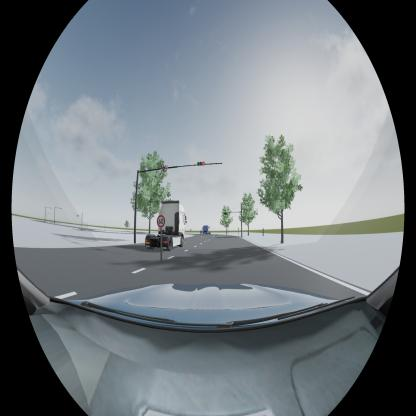

In [9]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "D:/ML/Traffic Sign Detection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [10]:
!pip install --upgrade ultralytics ray

   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.2 MB 2.8 MB/s eta 0:00:09
   --- ------------------------------------ 2.4/25.2 MB 5.6 MB/s eta 0:00:05
   ------------- -------------------------- 8.4/25.2 MB 14.9 MB/s eta 0:00:02
   -------------- ------------------------- 9.4/25.2 MB 13.7 MB/s eta 0:00:02
   --------------------- ------------------ 13.4/25.2 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 25.2/25.2 MB 21.3 MB/s eta 0:00:00


In [24]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="D:/ML/Traffic Sign Detection/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.57  Python-3.12.2 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8700K 3.70GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/ML/Traffic Sign Detection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning D:\ML\Traffic Sign Detection\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch:   intended for CUDA devices, using default batch-size 16



train: Scanning D:\ML\Traffic Sign Detection\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning D:\ML\Traffic Sign Detection\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G     0.8515      3.434      1.185         21        640: 100%|██████████| 221/221 [17:03<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:28<00:00,  3.39s/it]


                   all        801        944      0.173      0.501      0.242      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.7694      2.538      1.109         16        640: 100%|██████████| 221/221 [16:03<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.24s/it]


                   all        801        944      0.333       0.54      0.355      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.7566       2.17      1.088         31        640: 100%|██████████| 221/221 [16:07<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.26s/it]

                   all        801        944      0.433      0.575      0.454      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.7298      1.822      1.074         17        640: 100%|██████████| 221/221 [16:03<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:25<00:00,  3.27s/it]

                   all        801        944      0.602      0.665      0.687      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      0.706      1.561       1.06         29        640: 100%|██████████| 221/221 [16:02<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.27s/it]

                   all        801        944      0.769      0.645      0.731      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.6921      1.392      1.052         17        640: 100%|██████████| 221/221 [16:03<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:25<00:00,  3.28s/it]

                   all        801        944      0.803      0.743      0.822      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.6655      1.269      1.036         22        640: 100%|██████████| 221/221 [16:14<00:00,  4.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:26<00:00,  3.34s/it]

                   all        801        944      0.844      0.721      0.831      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.6535      1.168      1.022         25        640: 100%|██████████| 221/221 [16:03<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:23<00:00,  3.22s/it]

                   all        801        944      0.871       0.74       0.85      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.6393      1.078      1.016         21        640: 100%|██████████| 221/221 [16:10<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.26s/it]

                   all        801        944      0.905      0.768      0.871      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.6473      1.048      1.021         19        640: 100%|██████████| 221/221 [15:46<00:00,  4.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.13s/it]

                   all        801        944      0.906      0.787      0.882      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.6369     0.9984      1.014         20        640: 100%|██████████| 221/221 [15:28<00:00,  4.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.13s/it]

                   all        801        944      0.926      0.784      0.875       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      0.619     0.9253      1.003         23        640: 100%|██████████| 221/221 [15:28<00:00,  4.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

                   all        801        944      0.922      0.806      0.905      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.6089     0.8913     0.9986         15        640: 100%|██████████| 221/221 [15:37<00:00,  4.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:22<00:00,  3.19s/it]

                   all        801        944      0.926      0.799       0.89      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.5974     0.8667     0.9914         19        640: 100%|██████████| 221/221 [15:40<00:00,  4.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.12s/it]

                   all        801        944       0.94      0.802      0.907      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.5983     0.8379     0.9989         24        640: 100%|██████████| 221/221 [15:38<00:00,  4.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:23<00:00,  3.23s/it]

                   all        801        944      0.929      0.824      0.913      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.5966     0.8142     0.9891         29        640: 100%|██████████| 221/221 [15:44<00:00,  4.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

                   all        801        944      0.945      0.829      0.917      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.5785     0.7793     0.9874         14        640: 100%|██████████| 221/221 [15:32<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:22<00:00,  3.16s/it]

                   all        801        944      0.954      0.844      0.929      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.5758     0.7711     0.9802         17        640: 100%|██████████| 221/221 [18:05<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:34<00:00,  3.63s/it]

                   all        801        944      0.956      0.847      0.934      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      0.578     0.7549     0.9796         20        640: 100%|██████████| 221/221 [16:42<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.25s/it]

                   all        801        944      0.939      0.851      0.932      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.5714     0.7297     0.9788         20        640: 100%|██████████| 221/221 [15:32<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:22<00:00,  3.16s/it]

                   all        801        944      0.956      0.857       0.94      0.803


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.5604     0.5283      0.954         14        640: 100%|██████████| 221/221 [15:22<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

                   all        801        944      0.938      0.849      0.935      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.5542     0.4898     0.9423         13        640: 100%|██████████| 221/221 [15:20<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

                   all        801        944      0.926      0.876      0.946       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.5439     0.4799     0.9389         15        640: 100%|██████████| 221/221 [15:20<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:25<00:00,  3.30s/it]

                   all        801        944       0.95      0.874      0.946      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.5371     0.4522      0.928         10        640: 100%|██████████| 221/221 [15:45<00:00,  4.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

                   all        801        944      0.943       0.85      0.939      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.5362     0.4458     0.9277         14        640: 100%|██████████| 221/221 [15:31<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:25<00:00,  3.28s/it]

                   all        801        944      0.964      0.873      0.952      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.5235     0.4256     0.9257         10        640: 100%|██████████| 221/221 [15:51<00:00,  4.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:23<00:00,  3.22s/it]

                   all        801        944      0.932      0.894      0.952      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.5201     0.4109     0.9174         18        640: 100%|██████████| 221/221 [15:44<00:00,  4.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

                   all        801        944      0.938      0.893      0.955      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.5125     0.3988     0.9159         14        640: 100%|██████████| 221/221 [15:38<00:00,  4.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.25s/it]

                   all        801        944      0.953      0.891      0.956      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.5064       0.39     0.9182         10        640: 100%|██████████| 221/221 [15:55<00:00,  4.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.25s/it]

                   all        801        944      0.947      0.903      0.957      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.4985     0.3833      0.909         11        640: 100%|██████████| 221/221 [15:58<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.25s/it]

                   all        801        944      0.938      0.901      0.959      0.832



30 epochs completed in 8.667 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.3MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.57  Python-3.12.2 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8700K 3.70GHz)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:11<00:00,  2.73s/it]


                   all        801        944      0.938      0.902      0.959      0.832
           Green Light         87        122       0.89      0.731      0.857      0.506
             Red Light         74        108      0.863      0.694      0.833      0.517
       Speed Limit 100         52         52      0.916      0.942      0.984      0.898
       Speed Limit 110         17         17      0.892      0.976      0.983      0.906
       Speed Limit 120         60         60          1      0.909      0.995       0.92
        Speed Limit 20         56         56      0.972      0.982      0.986      0.867
        Speed Limit 30         71         74      0.946      0.959      0.986      0.926
        Speed Limit 40         53         55      0.899      0.964      0.987      0.887
        Speed Limit 50         68         71      0.968      0.854       0.96      0.854
        Speed Limit 60         76         76      0.923      0.921      0.966      0.877
        Speed Limit 7

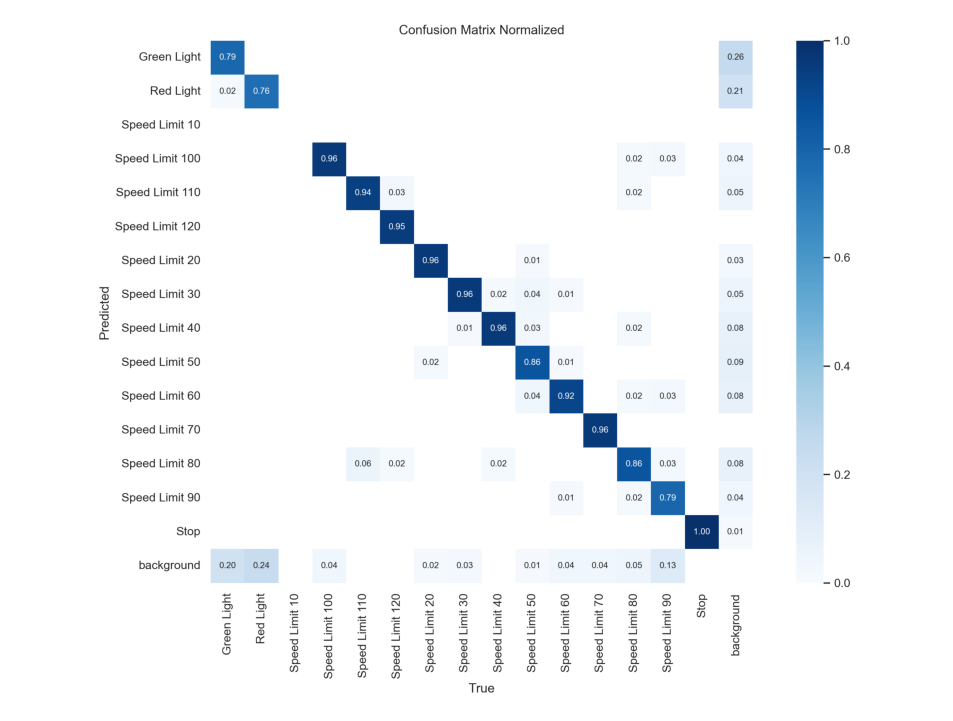

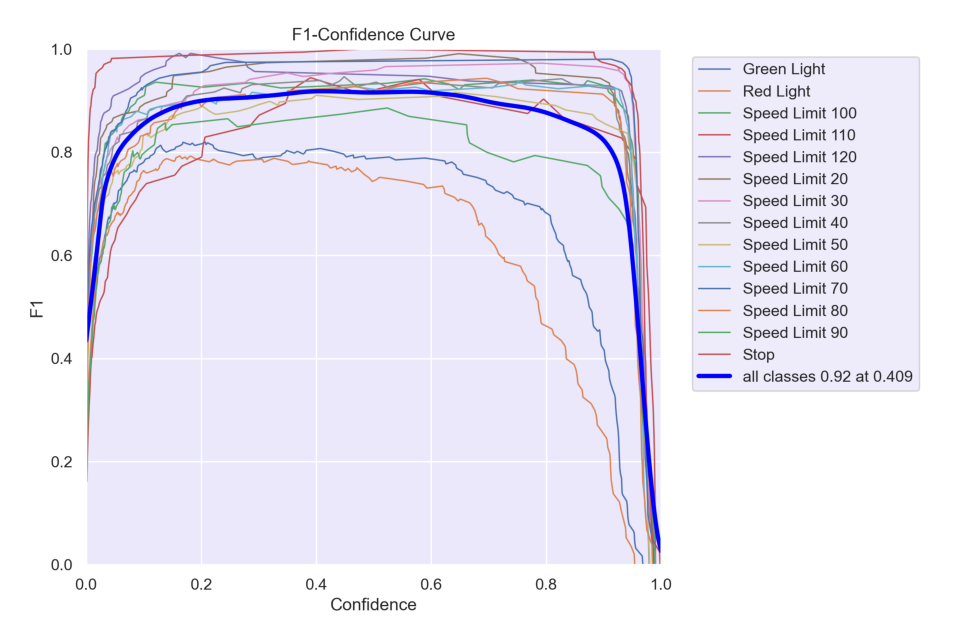

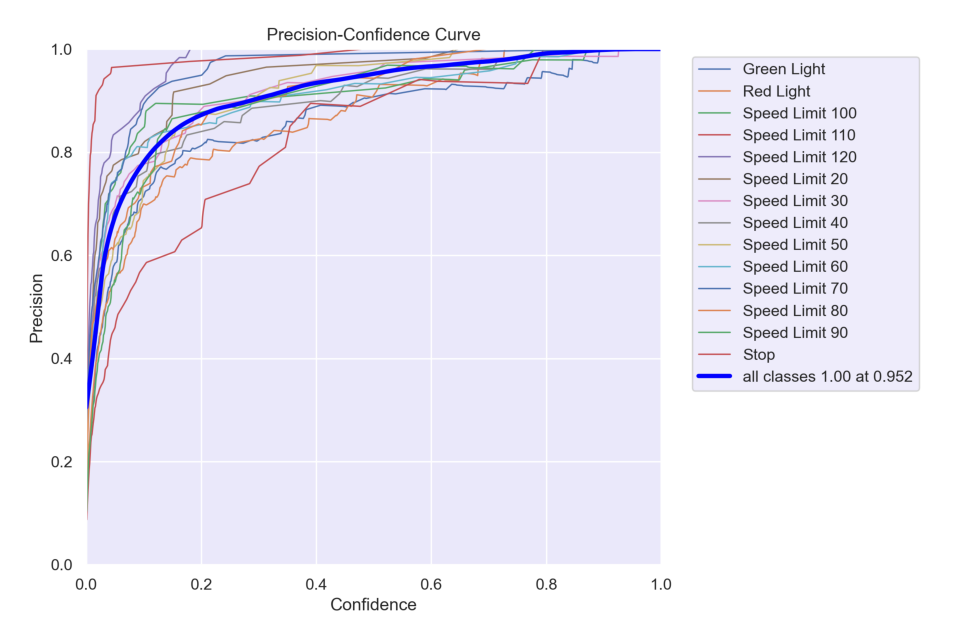

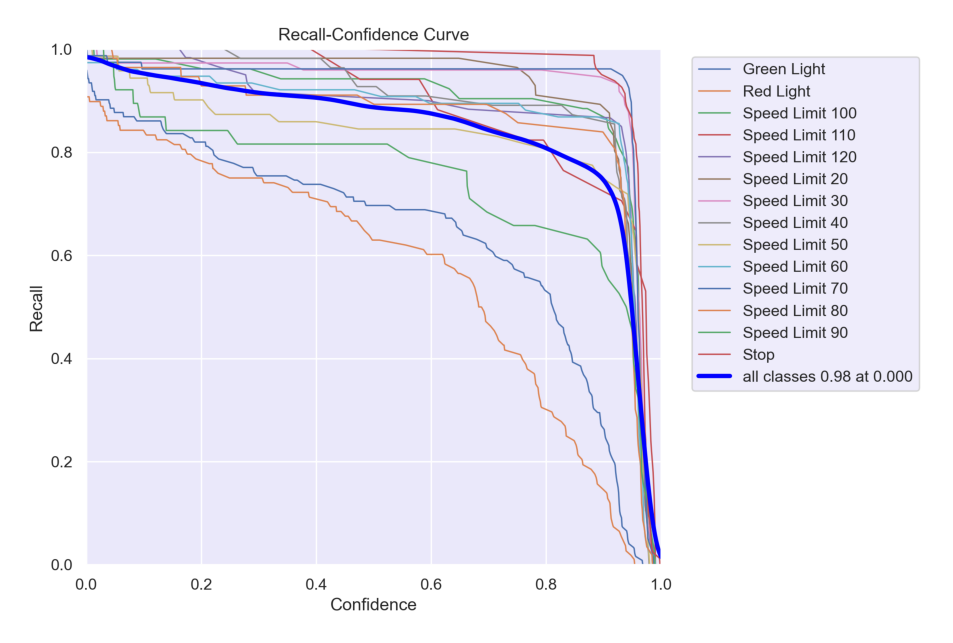

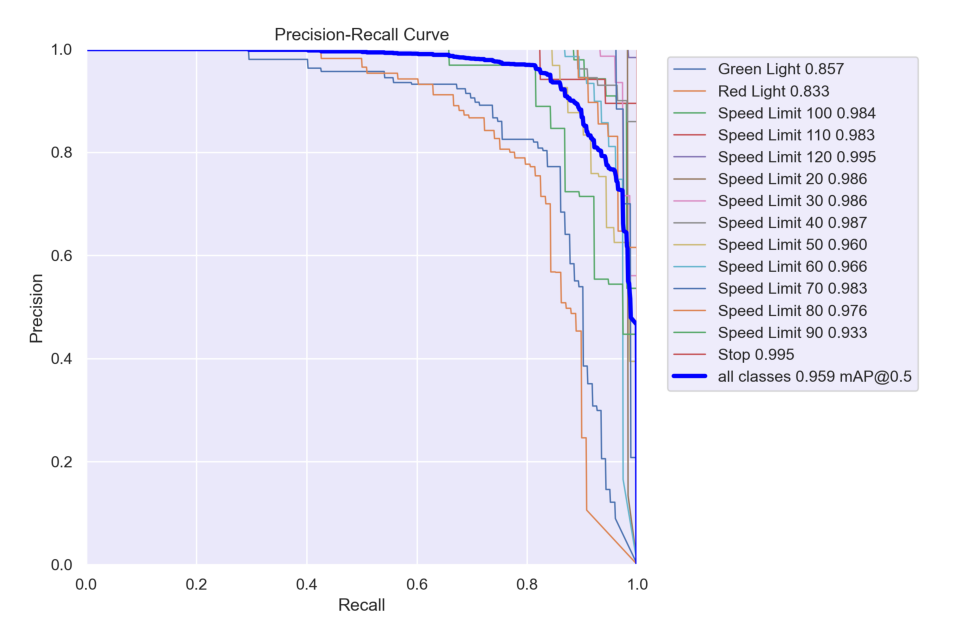

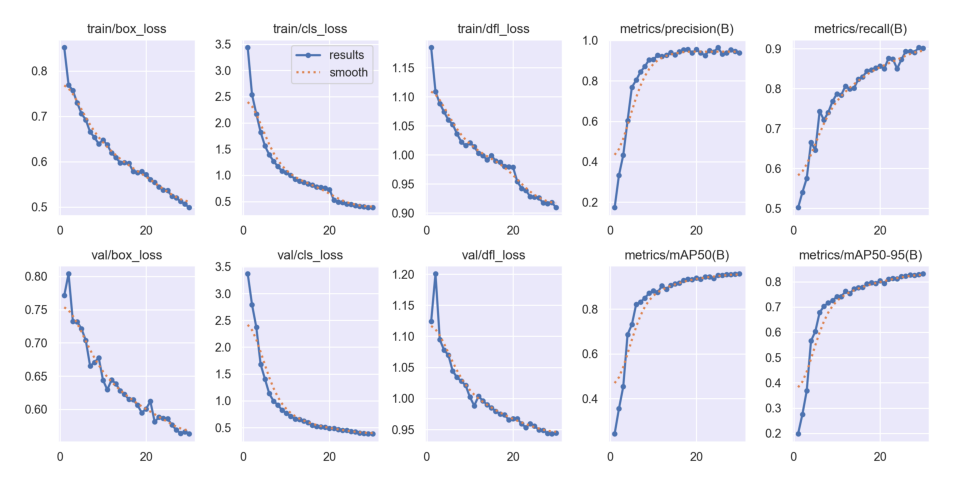

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'D:/ML/Traffic Sign Detection/runs/detect/train4'

# Display the images
display_images(post_training_files_path, image_files)

In [4]:
Result_Final_model = pd.read_csv('D:/ML/Traffic Sign Detection/runs/detect/train4/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  21977.4         0.56037         0.52831         0.95399   
21     22  22980.3         0.55418         0.48983         0.94225   
22     23  23987.4         0.54393         0.47988         0.93894   
23     24  25014.9         0.53706         0.45219         0.92800   
24     25  26032.3         0.53619         0.44584         0.92767   
25     26  27068.1         0.52353         0.42558         0.92570   
26     27  28094.9         0.52006         0.41089         0.91741   
27     28  29118.4         0.51248         0.39877         0.91590   
28     29  30159.0         0.50636         0.39004         0.91818   
29     30  31202.3         0.49845         0.38335         0.90904   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93805            0.84936           0.93457   
21               0.92592            0.87632           0.94555   
22               0.94993            0.87403           0.94555   
23               0.94321            0.84995           0.93869   
24               0.96439            0.87291           0.95215   
25               0.93209            0.89368           0.95164   
26               0.93813            0.89333           0.95496   
27               0.95335            0.89092           0.95587   
28               0.94701            0.90277           0.95702   
29               0.93782            0.90131           0.95872   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.79268       0.61187       0.48654       0.96736  0.000179   
21              0.80996       0.58105       0.46356       0.95921  0.000161   
22              0.81380       0.58808       0.44927       0.95327  0.000144   
23              0.81167       0.58652       0.45051       0.95964  0.000127   
24              0.82077       0.58567       0.42646       0.95555  0.000109   
25              0.82219       0.57650       0.41847       0.94946  0.000092   
26              0.82697       0.56882       0.40104       0.94880  0.000075   
27              0.82541       0.56390       0.39395       0.94407  0.000057   
28              0.82910       0.56606       0.38846       0.94318  0.000040   
29              0.83153       0.56312       0.38531       0.94465  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

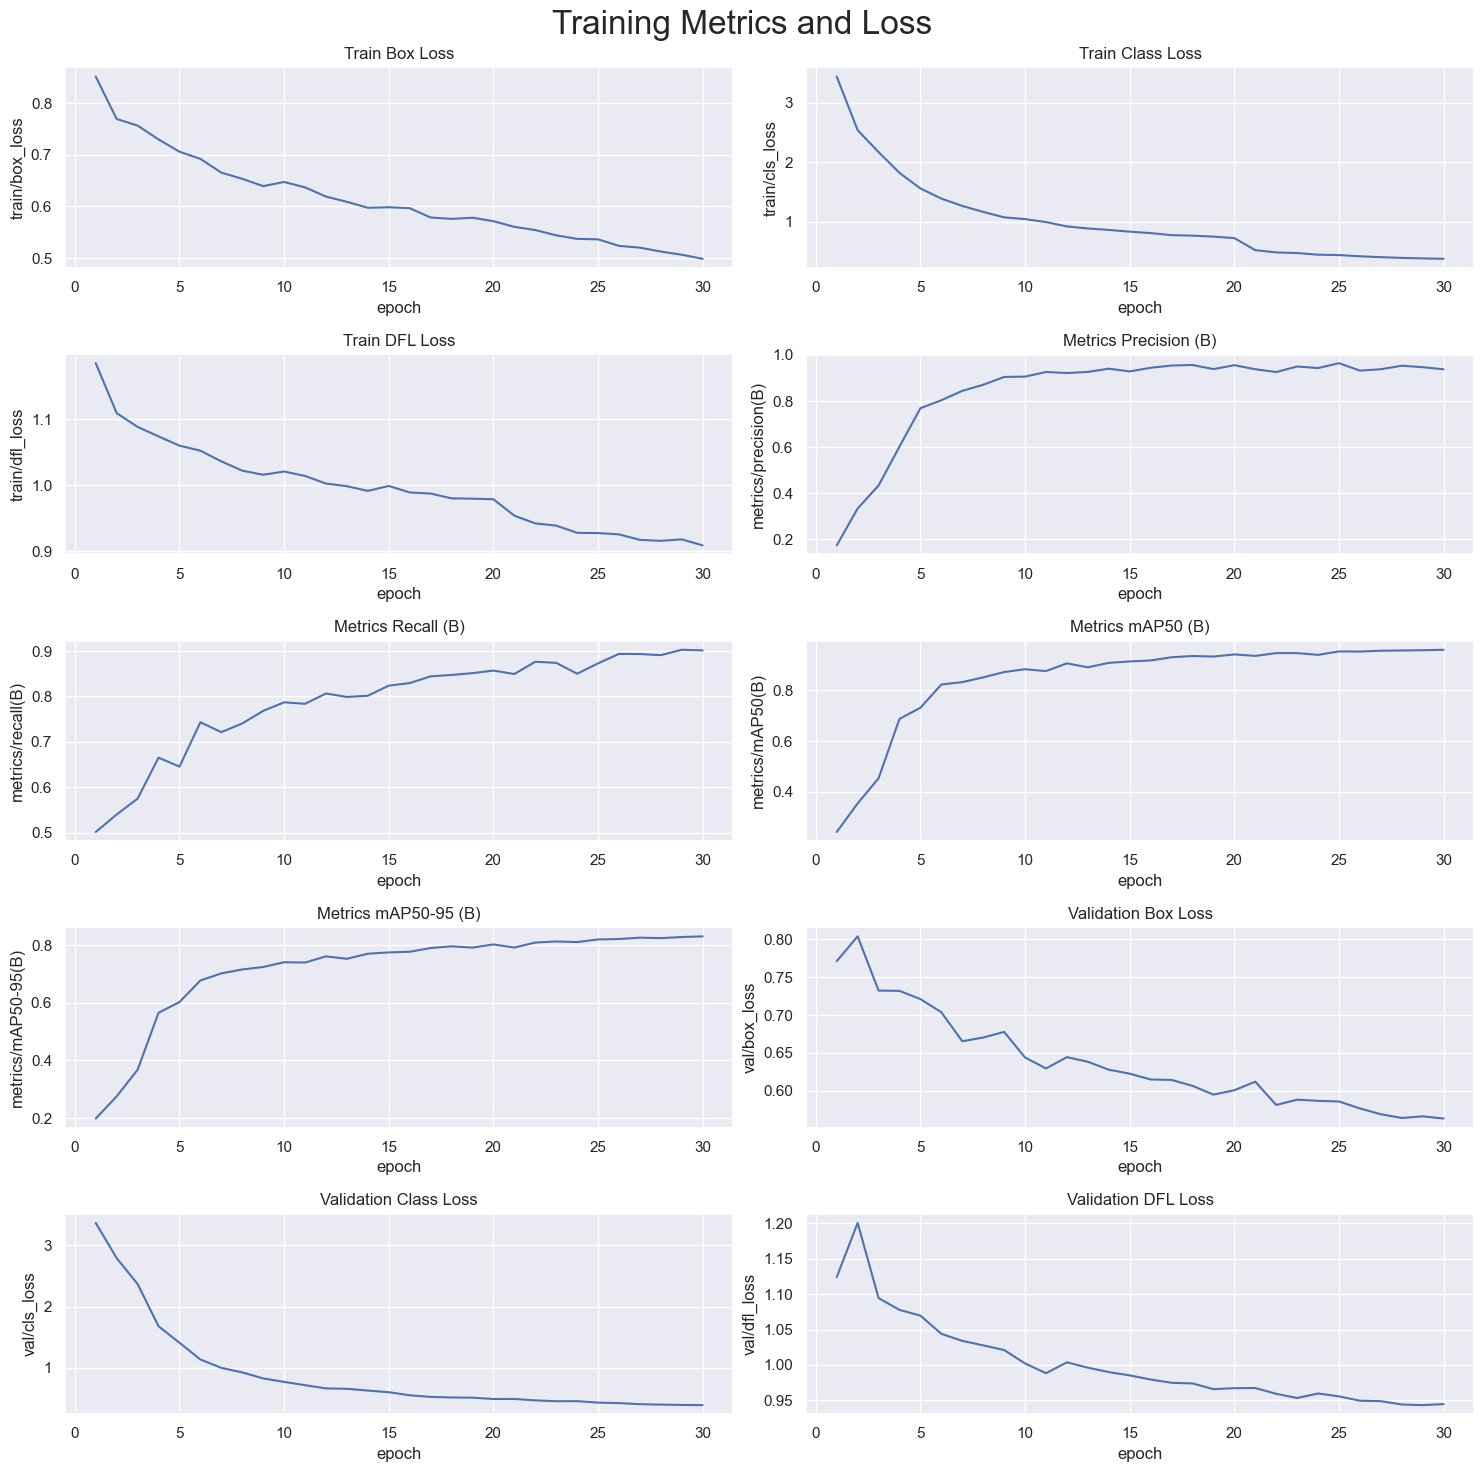

In [5]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


In [2]:
# Loading the best performing model
Valid_model = YOLO('D:/ML/Traffic Sign Detection/runs/detect/train4/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.57  Python-3.12.2 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8700K 3.70GHz)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\ML\Traffic Sign Detection\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [01:00<00:00,  1.19s/it]


                   all        801        944      0.938      0.902      0.959      0.832
           Green Light         87        122       0.89      0.731      0.857      0.506
             Red Light         74        108      0.863      0.694      0.833      0.517
       Speed Limit 100         52         52      0.916      0.942      0.984      0.898
       Speed Limit 110         17         17      0.892      0.976      0.983      0.906
       Speed Limit 120         60         60          1      0.909      0.995       0.92
        Speed Limit 20         56         56      0.972      0.982      0.986      0.867
        Speed Limit 30         71         74      0.946      0.959      0.986      0.926
        Speed Limit 40         53         55      0.899      0.964      0.987      0.887
        Speed Limit 50         68         71      0.968      0.854       0.96      0.854
        Speed Limit 60         76         76      0.923      0.921      0.966      0.877
        Speed Limit 7


0: 640x640 1 Speed Limit 30, 120.0ms
Speed: 3.0ms preprocess, 120.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 60.0ms
Speed: 3.0ms preprocess, 60.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 61.0ms
Speed: 3.0ms preprocess, 61.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 60.0ms
Speed: 2.0ms preprocess, 60.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 58.0ms
Speed: 2.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 60.0ms
Speed: 3.0ms preprocess, 60.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 58.0ms
Speed: 2.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 61.0ms
Speed: 2.0ms preprocess, 61.0ms inference,

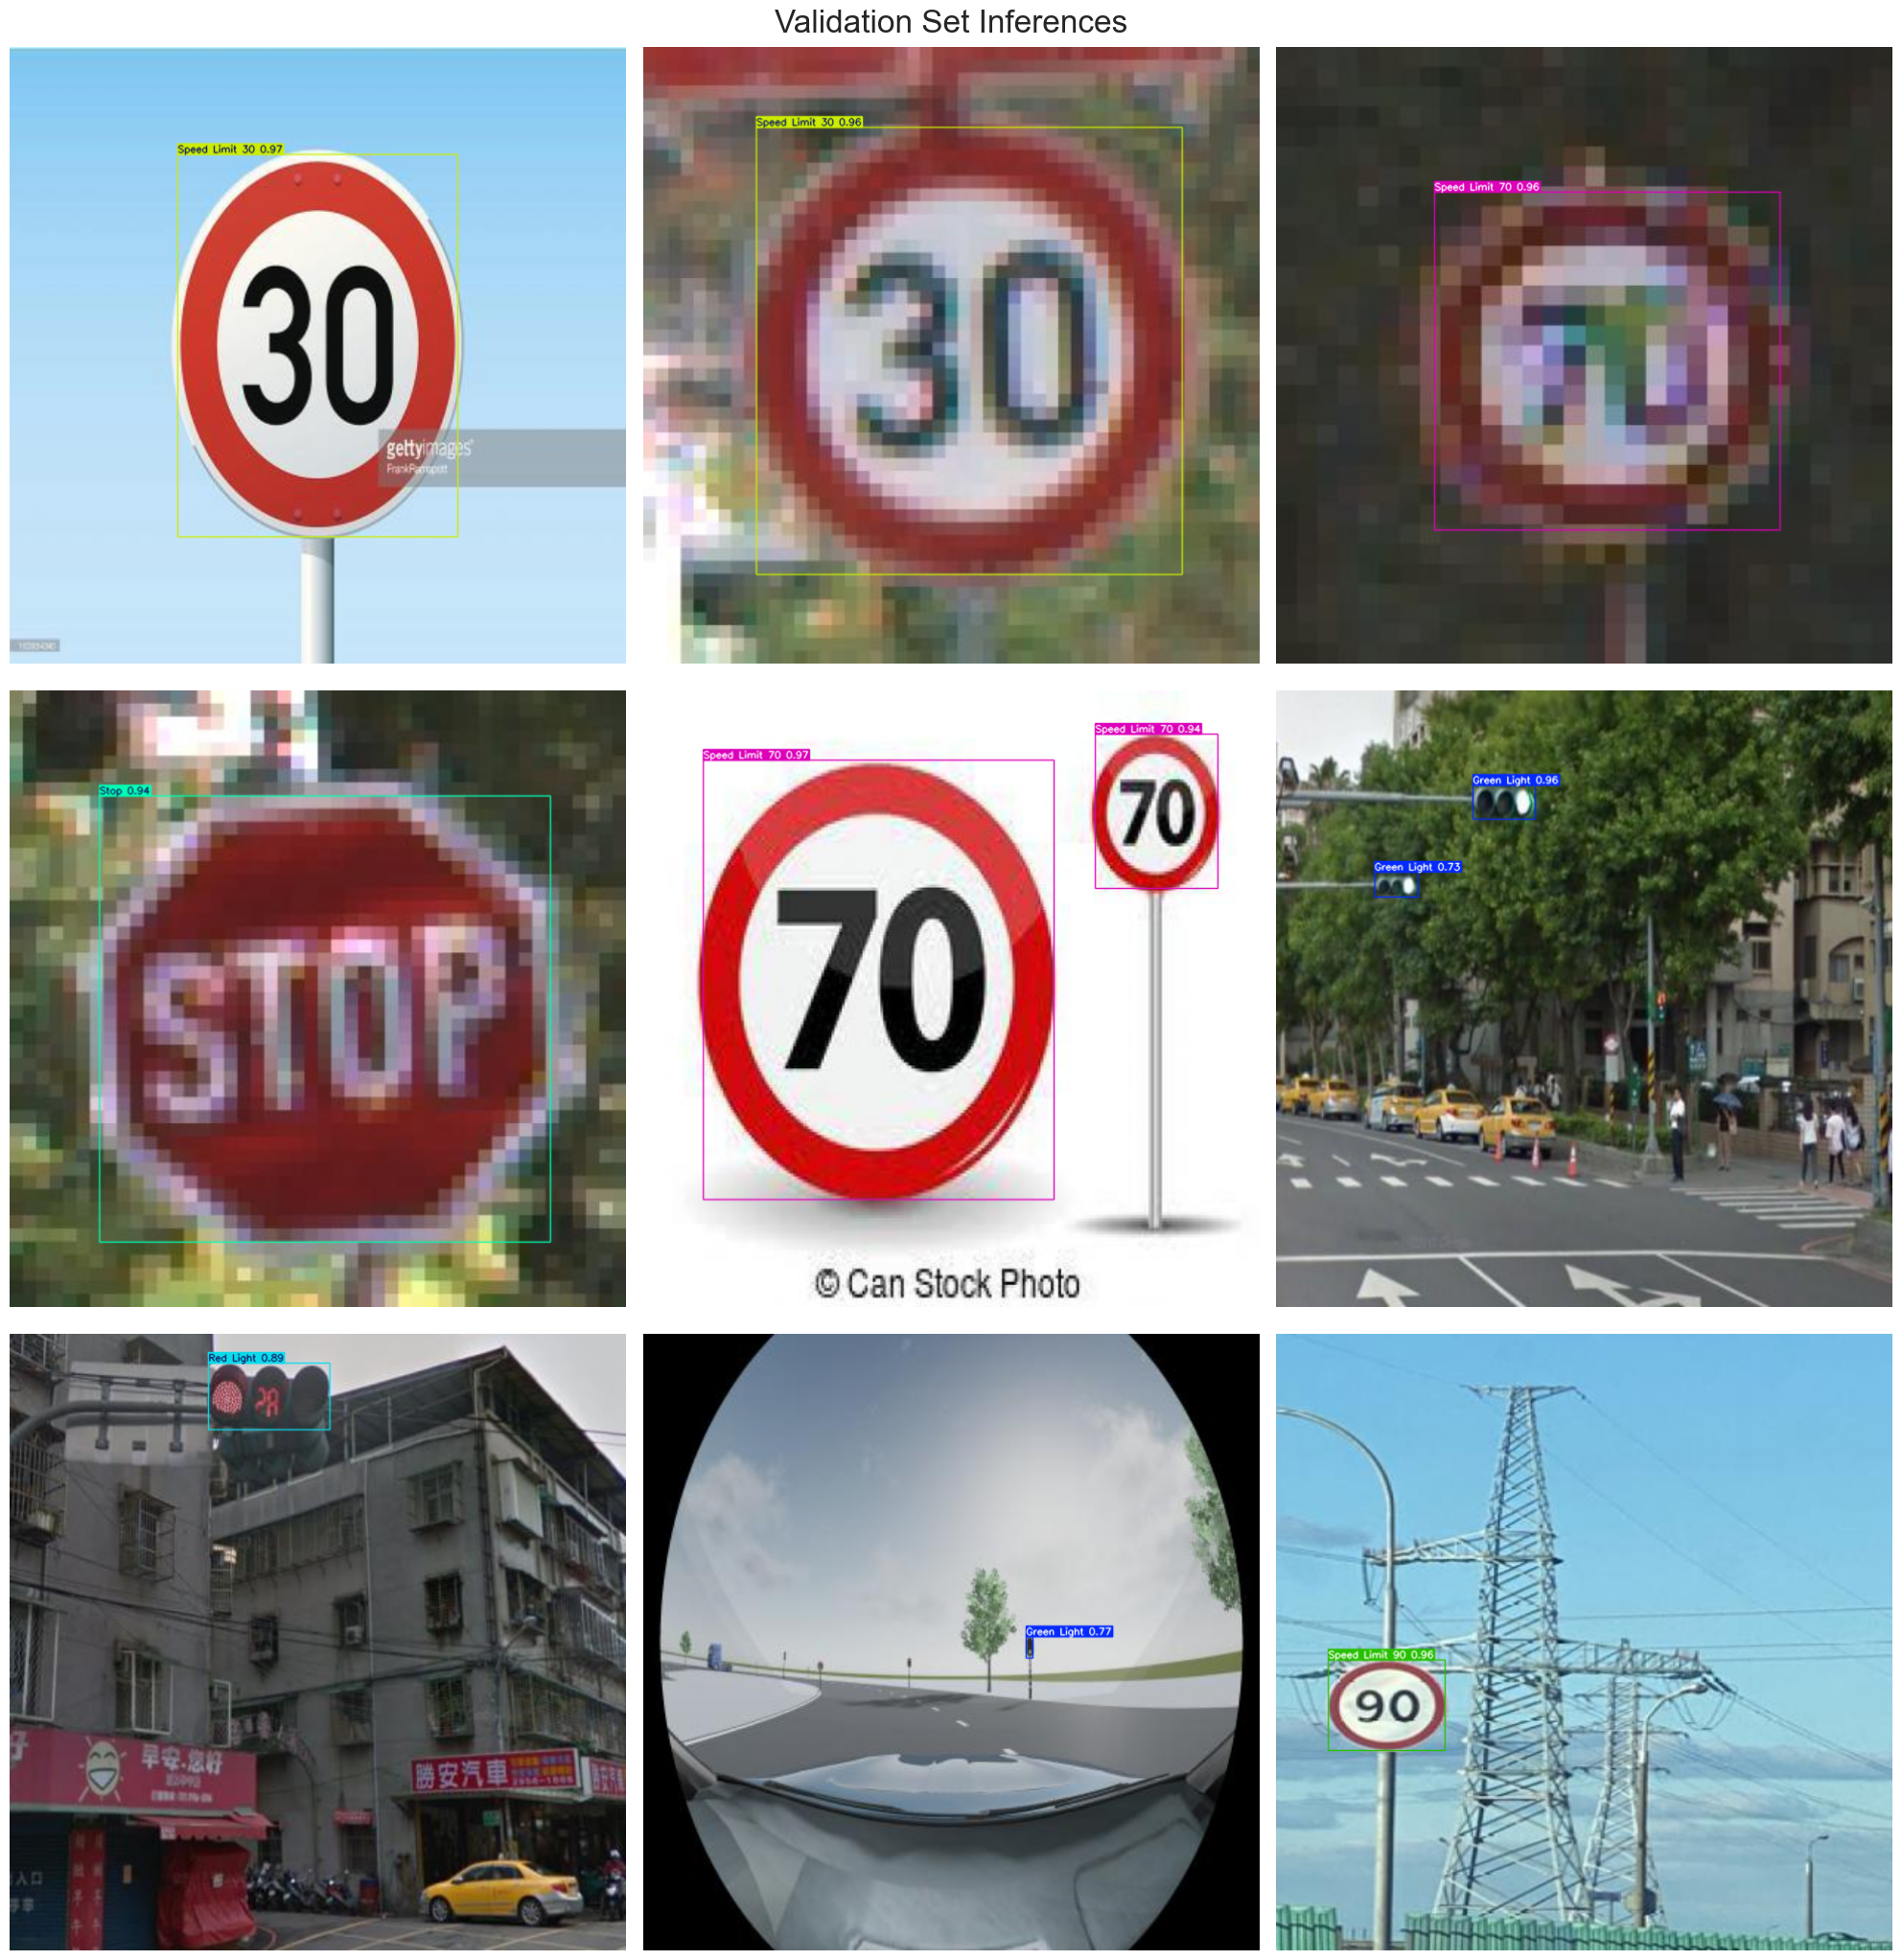

In [4]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = 'D:/ML/Traffic Sign Detection/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [51]:
# Use the model to detect signs
Valid_model.predict(source=r"D:/ML/Traffic Sign Detection/video.mp4", show=True,save = True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) D:\ML\Traffic Sign Detection\video.mp4: 640x640 1 Stop, 200.0ms
video 1/1 (frame 2/508) D:\ML\Traffic Sign Detection\video.mp4: 640x640 1 Stop, 66.0ms
video 1/1 (frame 3/508) D:\ML\Traffic Sign Detection\video.mp4: 640x640 1 Stop, 66.0ms
video 1/1 (frame 4/508) D:\ML\Traffic Sign Detection\video.mp4: 640x640 (no detections), 66.0ms
video 1/1 (frame 5/508) D:\ML\Traffic Sign Detection\video.mp4: 640x640 1 Stop, 61.0ms
video 1/1 (fr

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
     

: 

In [1]:
from IPython.display import Video

# Replace with your video file path
video_path = r"D:\ML\Traffic Sign Detection\runs\detect\predict\video.avi"
Video(video_path)